<a href="https://www.kaggle.com/code/lalit7881/housing-price-prediction-quarterly-accuracy-85?scriptVersionId=294787422" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/european-housing-price-index-dataset/european_housing_prices_clean.csv


## European Housing Price Index 2022-2025 | Quarterly

## 📊 What the European House Price Index (HPI) Is

The House Price Index (HPI) is an official statistical measure produced by Eurostat (the statistical office of the European Union) that tracks changes in the transaction prices of residential properties — including flats, detached houses, terraced houses, both newly built and existing — purchased by households across the Euro Area (EA) and the European Union (EU). It is a nominal index with base year 2015 = 100 (i.e., values are expressed relative to what prices were on average in Q1 2015).

Types of measures included:

Total HPI (aggregate of all dwellings)

Sub‑indices for new and existing dwellings (in detailed national reports)

Can be used in “real” terms (adjusted for inflation) and compared with other indicators like rents.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/european-housing-price-index-dataset/european_housing_prices_clean.csv")

In [3]:
df.head()

,country,country_type,eu_member,eurozone_member,year,quarter_num,quarter,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct,data_quality
0,Austria,Individual,Yes,Yes,2022,4,2022-Q4,166.32,-4.2,5.7,66.32,Complete
1,Austria,Individual,Yes,Yes,2023,1,2023-Q1,164.35,-1.2,-0.2,64.35,Complete
2,Austria,Individual,Yes,Yes,2023,2,2023-Q2,164.68,0.2,-2.8,64.68,Complete
3,Austria,Individual,Yes,Yes,2023,3,2023-Q3,164.29,-0.2,-5.4,64.29,Complete
4,Austria,Individual,Yes,Yes,2023,4,2023-Q4,161.40,-1.8,-3.0,61.40,Complete


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      417 non-null    object 
 1   country_type                 417 non-null    object 
 2   eu_member                    357 non-null    object 
 3   eurozone_member              357 non-null    object 
 4   year                         417 non-null    int64  
 5   quarter_num                  417 non-null    int64  
 6   quarter                      417 non-null    object 
 7   price_index                  405 non-null    float64
 8   quarterly_change_pct         417 non-null    float64
 9   yearly_change_pct            417 non-null    float64
 10  price_change_since_2015_pct  405 non-null    float64
 11  data_quality                 417 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 39.2+ KB


In [5]:
df.describe()

,year,quarter_num,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct
count,417.000000,417.000000,405.000000,417.000000,417.000000,405.000000
mean,2023.741007,2.503597,201.283012,1.276499,6.317506,101.283012
std,0.922513,1.120444,192.360171,2.698651,14.530613,192.360171
min,2022.000000,1.000000,98.280000,-6.600000,-14.500000,-1.720000
25%,2023.000000,2.000000,145.800000,-0.100000,1.100000,45.800000
50%,2024.000000,3.000000,164.250000,1.200000,4.700000,64.250000
75%,2024.000000,4.000000,203.620000,2.400000,8.400000,103.620000
max,2025.000000,4.000000,1884.940000,22.700000,170.500000,1784.940000


In [6]:
df.tail()

,country,country_type,eu_member,eurozone_member,year,quarter_num,quarter,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct,data_quality
412,Türkiye,Individual,No,No,2023,4,2023-Q4,1466.37,10.6,87.3,1366.37,Complete
413,Türkiye,Individual,No,No,2024,1,2024-Q1,1569.31,7.0,63.3,1469.31,Complete
414,Türkiye,Individual,No,No,2024,2,2024-Q2,1664.83,6.1,49.7,1564.83,Complete
415,Türkiye,Individual,No,No,2024,3,2024-Q3,1767.04,6.1,33.3,1667.04,Complete
416,Türkiye,Individual,No,No,2024,4,2024-Q4,1884.94,6.7,28.5,1784.94,Complete


In [7]:
df.isnull().sum()

country                         0
country_type                    0
eu_member                      60
eurozone_member                60
year                            0
quarter_num                     0
quarter                         0
price_index                    12
quarterly_change_pct            0
yearly_change_pct               0
price_change_since_2015_pct    12
data_quality                    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(417, 12)

In [10]:
df.dtypes

country                         object
country_type                    object
eu_member                       object
eurozone_member                 object
year                             int64
quarter_num                      int64
quarter                         object
price_index                    float64
quarterly_change_pct           float64
yearly_change_pct              float64
price_change_since_2015_pct    float64
data_quality                    object
dtype: object

In [11]:
df.columns

Index(['country', 'country_type', 'eu_member', 'eurozone_member', 'year',
       'quarter_num', 'quarter', 'price_index', 'quarterly_change_pct',
       'yearly_change_pct', 'price_change_since_2015_pct', 'data_quality'],
      dtype='object')

## Data visualizations

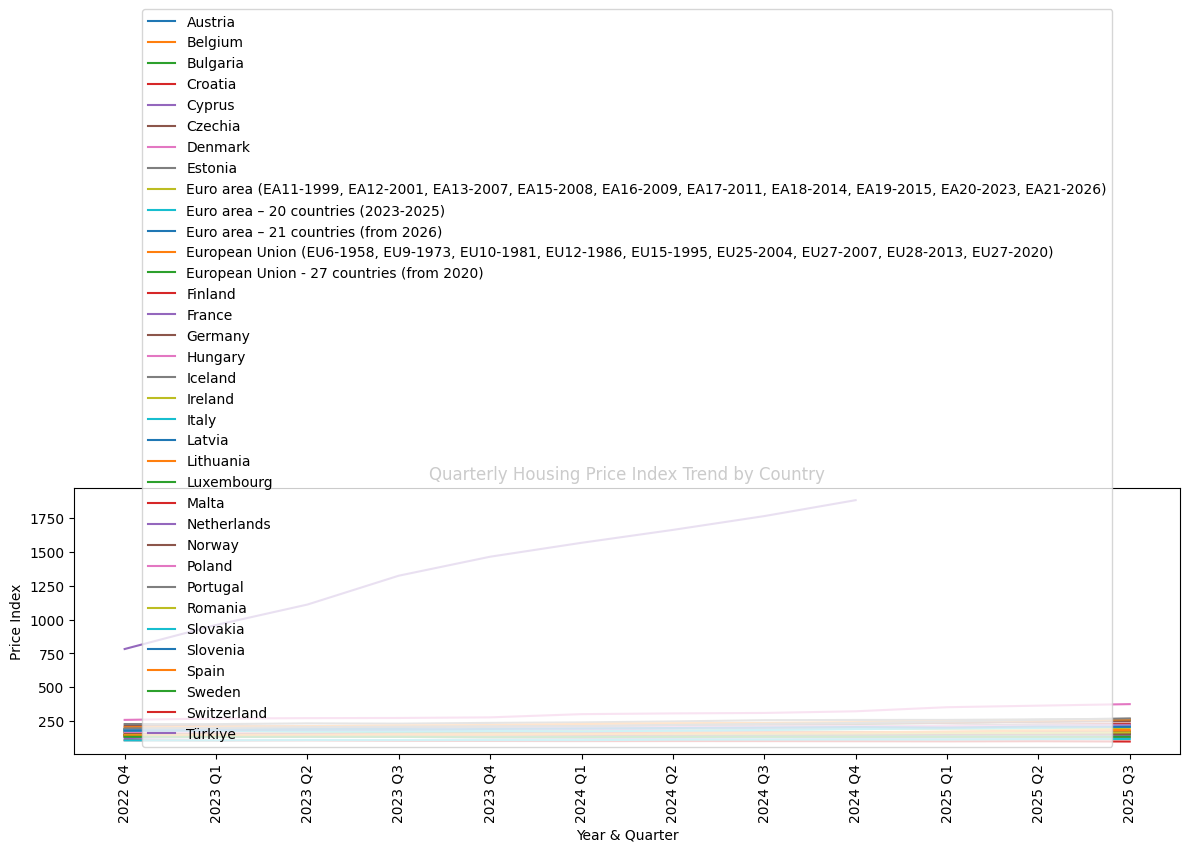

In [12]:
plt.figure(figsize=(12,6))

for country in df['country'].unique():
    subset = df[df['country'] == country]
    plt.plot(
        subset['year'].astype(str) + ' Q' + subset['quarter_num'].astype(str),
        subset['price_index'],
        label=country
    )

plt.xticks(rotation=90)
plt.xlabel("Year & Quarter")
plt.ylabel("Price Index")
plt.title("Quarterly Housing Price Index Trend by Country")
plt.legend()
plt.tight_layout()
plt.show()


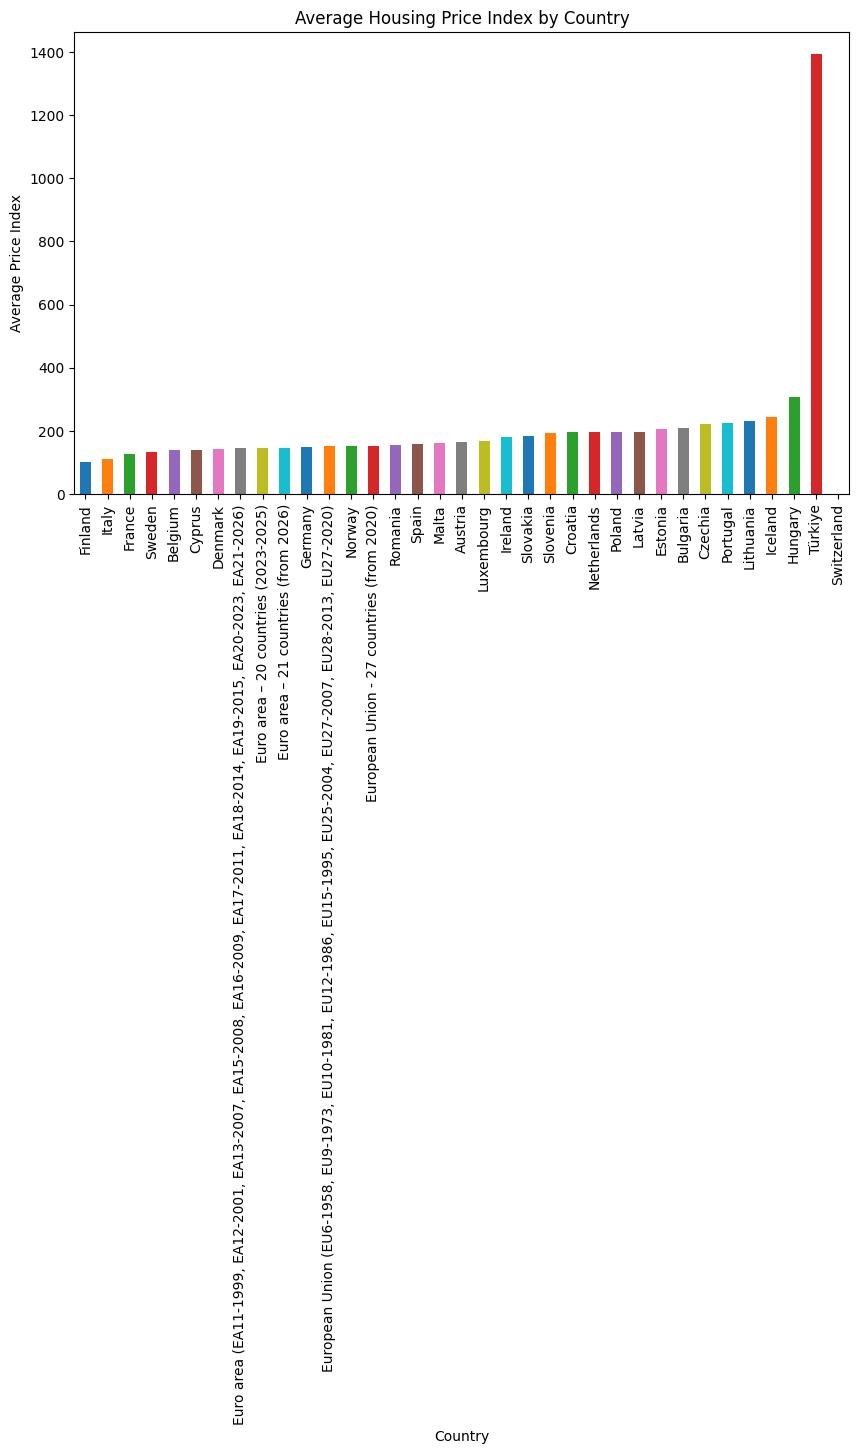

In [13]:
avg_price = df.groupby('country')['price_index'].mean().sort_values()

plt.figure(figsize=(10,6))
avg_price.plot(kind='bar', color=sns.color_palette("tab10"))

plt.xlabel("Country")
plt.ylabel("Average Price Index")
plt.title("Average Housing Price Index by Country")
plt.show()


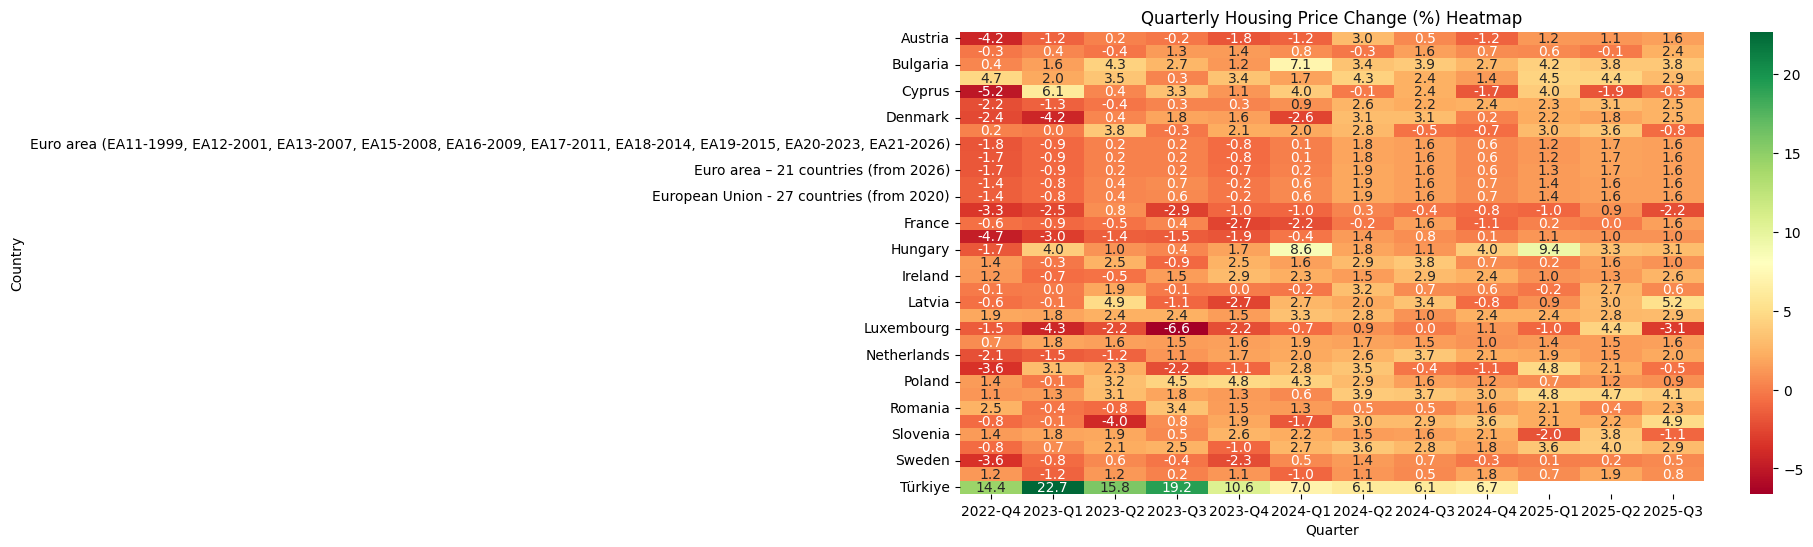

In [14]:
pivot = df.pivot_table(
    values='quarterly_change_pct',
    index='country',
    columns='quarter',
    aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(
    pivot,
    cmap="RdYlGn",
    annot=True,
    fmt=".1f"
)

plt.title("Quarterly Housing Price Change (%) Heatmap")
plt.xlabel("Quarter")
plt.ylabel("Country")
plt.show()


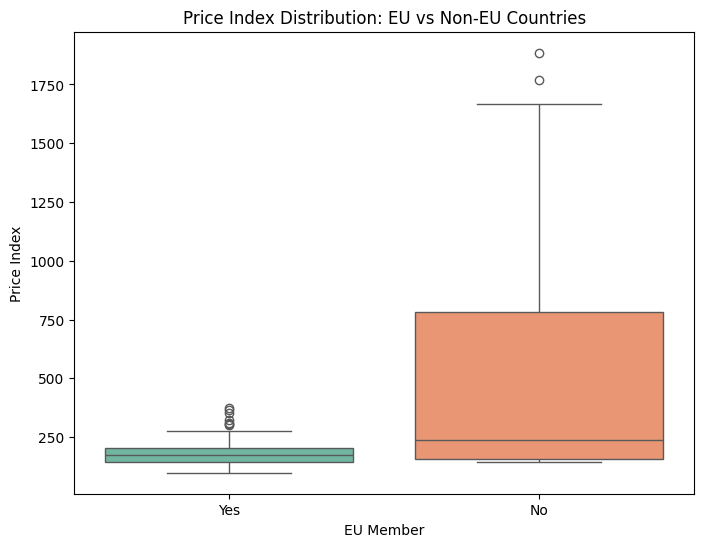

In [15]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data=df,
    x='eu_member',
    y='price_index',
    palette="Set2"
)

plt.xlabel("EU Member")
plt.ylabel("Price Index")
plt.title("Price Index Distribution: EU vs Non-EU Countries")
plt.show()


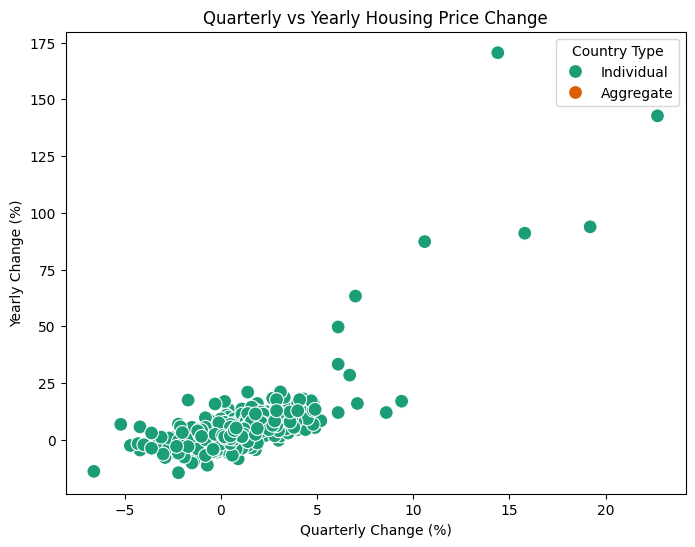

In [16]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x='quarterly_change_pct',
    y='yearly_change_pct',
    hue='country_type',
    palette="Dark2",
    s=100
)

plt.xlabel("Quarterly Change (%)")
plt.ylabel("Yearly Change (%)")
plt.title("Quarterly vs Yearly Housing Price Change")
plt.legend(title="Country Type")
plt.show()


In [17]:
area_df = df.pivot_table(
    values='price_change_since_2015_pct',
    index='year',
    columns='country',
    aggfunc='mean'
)


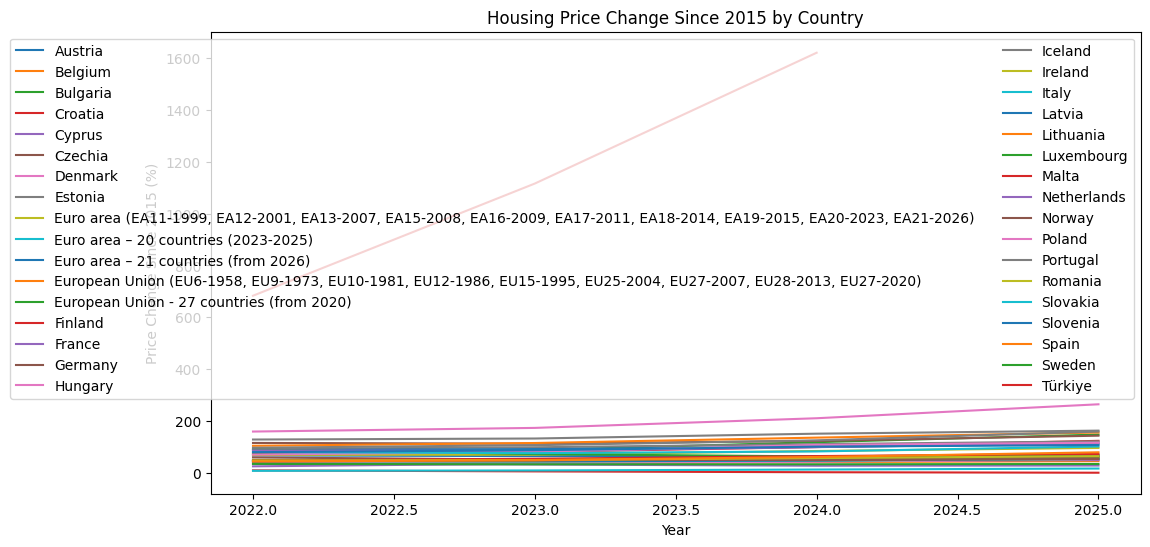

In [18]:
plt.figure(figsize=(12,6))

for country in area_df.columns:
    plt.plot(area_df.index, area_df[country], label=country)

plt.xlabel("Year")
plt.ylabel("Price Change Since 2015 (%)")
plt.title("Housing Price Change Since 2015 by Country")
plt.legend(ncol=2)
plt.show()


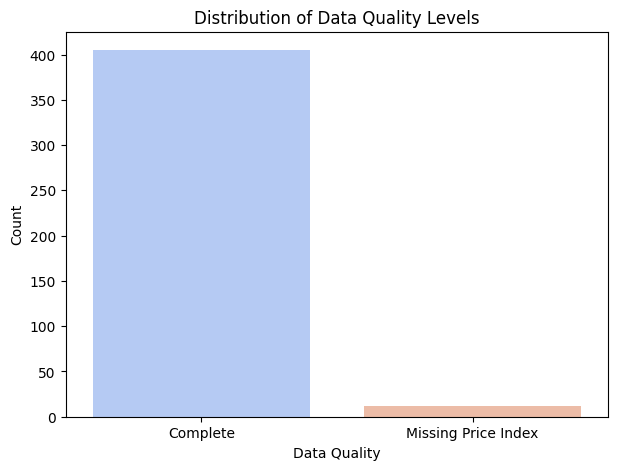

In [19]:
plt.figure(figsize=(7,5))

sns.countplot(
    data=df,
    x='data_quality',
    palette="coolwarm"
)

plt.xlabel("Data Quality")
plt.ylabel("Count")
plt.title("Distribution of Data Quality Levels")
plt.show()


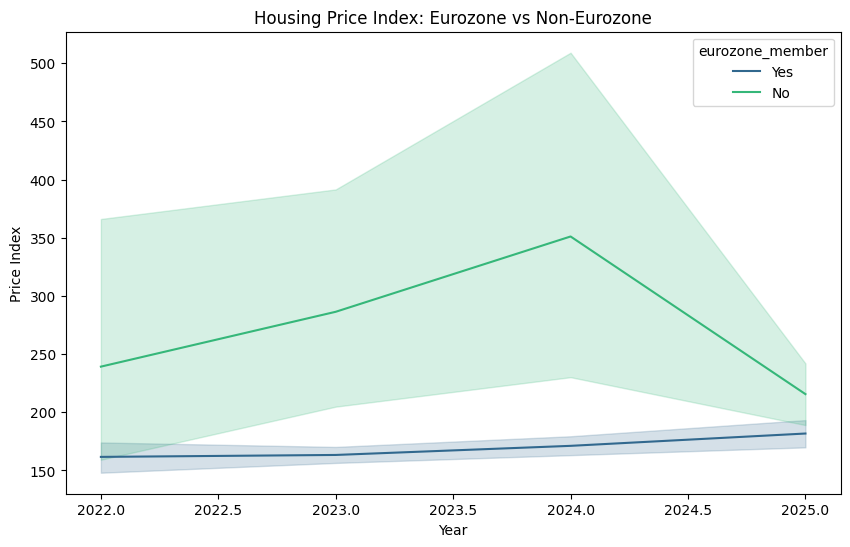

In [20]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=df,
    x='year',
    y='price_index',
    hue='eurozone_member',
    palette="viridis"
)

plt.xlabel("Year")
plt.ylabel("Price Index")
plt.title("Housing Price Index: Eurozone vs Non-Eurozone")
plt.show()


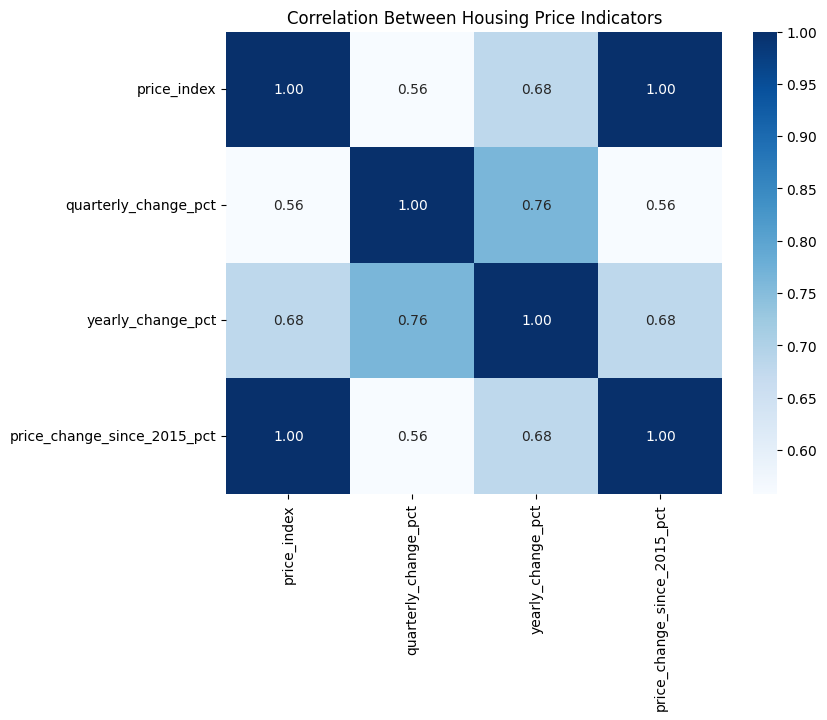

In [21]:
numeric_cols = [
    'price_index',
    'quarterly_change_pct',
    'yearly_change_pct',
    'price_change_since_2015_pct'
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title("Correlation Between Housing Price Indicators")
plt.show()


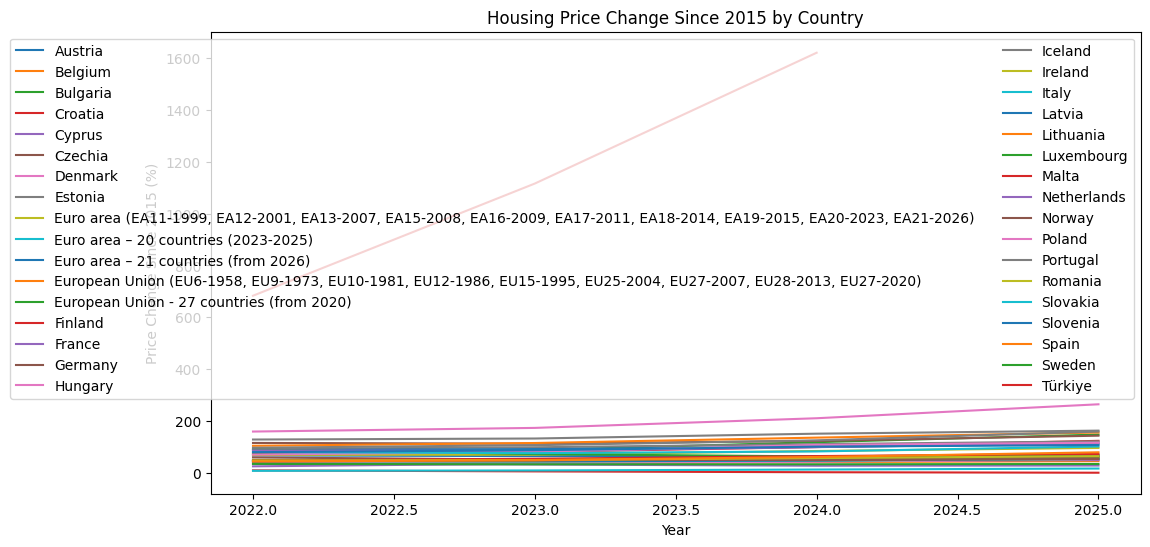

In [22]:
plt.figure(figsize=(12,6))

for country in area_df.columns:
    plt.plot(area_df.index, area_df[country], label=country)

plt.xlabel("Year")
plt.ylabel("Price Change Since 2015 (%)")
plt.title("Housing Price Change Since 2015 by Country")
plt.legend(ncol=2)
plt.show()


## Features engg

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [24]:
df['price_trend'] = np.where(df['yearly_change_pct'] > 0, 1, 0)


In [25]:
df['quarter_weight'] = df['quarter_num'] / 4


In [26]:
df['eu_member_num'] = df['eu_member'].map({'Yes': 1, 'No': 0})
df['eurozone_member_num'] = df['eurozone_member'].map({'Yes': 1, 'No': 0})

df['eu_eurozone_flag'] = df['eu_member_num'] + df['eurozone_member_num']


In [27]:
df = df.sort_values(['country', 'year', 'quarter_num'])

df['prev_price_index'] = df.groupby('country')['price_index'].shift(1)


In [28]:
num_imputer = SimpleImputer(strategy='median')

df[['prev_price_index']] = num_imputer.fit_transform(
    df[['prev_price_index']]
)


In [29]:
label_cols = ['country', 'country_type', 'data_quality']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [30]:
X = df[
    [
        'country',
        'country_type',
        'year',
        'quarter_num',
        'quarter_weight',
        'price_index',
        'quarterly_change_pct',
        'price_change_since_2015_pct',
        'prev_price_index',
        'eu_member_num',
        'eurozone_member_num',
        'eu_eurozone_flag',
        'data_quality'
    ]
]

y = df['price_trend']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [32]:
imputer = SimpleImputer(strategy='median')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [33]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}


In [35]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    results.append([name, round(acc, 2)])


In [36]:
accuracy_df = pd.DataFrame(results, columns=['Model', 'Accuracy (%)'])
accuracy_df.sort_values(by='Accuracy (%)', ascending=False)


,Model,Accuracy (%)
3,K-Nearest Neighbors,85.71
2,Random Forest,85.71
4,Support Vector Machine,82.86
0,Logistic Regression,81.90
1,Decision Tree,81.90
5,Naive Bayes,40.00


## Thank you..pls upvote!!!!